In [1]:
from google.colab import files
uploaded = files.upload()



Saving olist_customers_dataset.csv.zip to olist_customers_dataset.csv.zip


In [3]:
uploaded.keys()


dict_keys(['olist_customers_dataset.csv.zip'])

In [5]:
import zipfile
import io

with zipfile.ZipFile(io.BytesIO(uploaded['olist_customers_dataset.csv.zip']), 'r') as zip_ref:
    zip_ref.extractall("./olist")


In [6]:
import os
os.listdir("./olist")


['olist_customers_dataset.csv']

In [7]:
from google.colab import files
uploaded = files.upload()


Saving archive.zip to archive.zip


In [9]:
uploaded.keys()


dict_keys(['archive.zip'])

In [10]:
import zipfile, io

with zipfile.ZipFile(io.BytesIO(uploaded['archive.zip']), 'r') as zip_ref:
    zip_ref.extractall("./olist")


In [11]:
import os
os.listdir("./olist")


['product_category_name_translation.csv',
 'olist_order_reviews_dataset.csv',
 'olist_orders_dataset.csv',
 'olist_sellers_dataset.csv',
 'olist_order_items_dataset.csv',
 'olist_geolocation_dataset.csv',
 'olist_products_dataset.csv',
 'olist_order_payments_dataset.csv',
 'olist_customers_dataset.csv']

In [12]:
import pandas as pd

# Load datasets
orders = pd.read_csv("./olist/olist_orders_dataset.csv")
customers = pd.read_csv("./olist/olist_customers_dataset.csv")
order_items = pd.read_csv("./olist/olist_order_items_dataset.csv")
payments = pd.read_csv("./olist/olist_order_payments_dataset.csv")

# Quick check
print("Orders:", orders.shape)
print("Customers:", customers.shape)
print("Order Items:", order_items.shape)
print("Payments:", payments.shape)

# First look
orders.head()


Orders: (99441, 8)
Customers: (99441, 5)
Order Items: (112650, 7)
Payments: (103886, 5)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [13]:
# Check first few rows
orders.head()

# Basic info
orders.info()

# Summary of order status
orders['order_status'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


,count
order_status,
delivered,96478
shipped,1107
canceled,625
unavailable,609
invoiced,314
processing,301
created,5
approved,2


In [14]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
print("Min:", orders['order_purchase_timestamp'].min())
print("Max:", orders['order_purchase_timestamp'].max())


Min: 2016-09-04 21:15:19
Max: 2018-10-17 17:30:18


In [15]:
# Keep only relevant statuses
relevant_statuses = ['delivered', 'shipped', 'canceled']
orders_clean = orders[orders['order_status'].isin(relevant_statuses)].copy()

# Convert timestamps to datetime
date_cols = ['order_purchase_timestamp', 'order_approved_at',
             'order_delivered_carrier_date', 'order_delivered_customer_date',
             'order_estimated_delivery_date']
for col in date_cols:
    orders_clean[col] = pd.to_datetime(orders_clean[col])

print("Original:", orders.shape)
print("Cleaned:", orders_clean.shape)

orders_clean['order_status'].value_counts()


Original: (99441, 8)
Cleaned: (98210, 8)


,count
order_status,
delivered,96478
shipped,1107
canceled,625


In [16]:
# Merge orders with customers
orders_customers = orders_clean.merge(
    customers[['customer_id', 'customer_unique_id']],
    on='customer_id',
    how='left'
)

print("Orders + Customers:", orders_customers.shape)
orders_customers.head()


Orders + Customers: (98210, 9)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6


In [17]:
# Aggregate payments per order (some orders have multiple payments)
payments_agg = payments.groupby('order_id', as_index=False)['payment_value'].sum()

# Merge with orders + customers
orders_cust_pay = orders_customers.merge(
    payments_agg,
    on='order_id',
    how='left'
)

print("Orders + Customers + Payments:", orders_cust_pay.shape)
orders_cust_pay.head()


Orders + Customers + Payments: (98210, 10)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,38.71
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,141.46
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,179.12
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,72.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,28.62


In [18]:
# Aggregate items per order (basket size = count of products)
items_agg = order_items.groupby('order_id', as_index=False).agg(
    basket_size=('order_item_id', 'count'),
    total_items_value=('price', 'sum'),
    total_freight_value=('freight_value', 'sum')
)

# Merge with previous table
orders_full = orders_cust_pay.merge(
    items_agg,
    on='order_id',
    how='left'
)

print("Final Master Table:", orders_full.shape)
orders_full.head()


Final Master Table: (98210, 13)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,payment_value,basket_size,total_items_value,total_freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,38.71,1.0,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,141.46,1.0,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,179.12,1.0,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,72.20,1.0,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,28.62,1.0,19.90,8.72


In [19]:
# Total orders placed
placed = orders_full['order_id'].nunique()

# Orders shipped
shipped = orders_full[orders_full['order_delivered_carrier_date'].notnull()]['order_id'].nunique()

# Orders delivered
delivered = orders_full[orders_full['order_status'] == 'delivered']['order_id'].nunique()

# Orders canceled
canceled = orders_full[orders_full['order_status'] == 'canceled']['order_id'].nunique()

funnel = pd.DataFrame({
    'Stage': ['Placed', 'Shipped', 'Delivered', 'Canceled'],
    'Orders': [placed, shipped, delivered, canceled]
})

funnel['Conversion Rate (%)'] = (funnel['Orders'] / placed * 100).round(2)
funnel


,Stage,Orders,Conversion Rate (%)
0,Placed,98210,100.00
1,Shipped,97658,99.44
2,Delivered,96478,98.24
3,Canceled,625,0.64


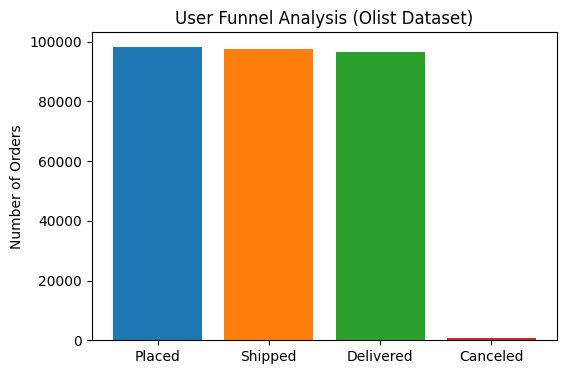

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.bar(funnel['Stage'], funnel['Orders'], color=['#1f77b4','#ff7f0e','#2ca02c','#d62728'])
plt.title("User Funnel Analysis (Olist Dataset)")
plt.ylabel("Number of Orders")
plt.show()


In [21]:
# Basket size and revenue by stage
funnel_metrics = {
    'Placed': orders_full,
    'Shipped': orders_full[orders_full['order_delivered_carrier_date'].notnull()],
    'Delivered': orders_full[orders_full['order_status'] == 'delivered'],
    'Canceled': orders_full[orders_full['order_status'] == 'canceled']
}

funnel_data = []
for stage, df in funnel_metrics.items():
    funnel_data.append({
        'Stage': stage,
        'Orders': df['order_id'].nunique(),
        'Avg Basket Size': df['basket_size'].mean().round(2),
        'Avg Revenue': df['payment_value'].mean().round(2)
    })

funnel_extended = pd.DataFrame(funnel_data)
funnel_extended['Conversion Rate (%)'] = (funnel_extended['Orders'] / funnel_extended.loc[funnel_extended['Stage']=="Placed",'Orders'].values[0] * 100).round(2)
funnel_extended


,Stage,Orders,Avg Basket Size,Avg Revenue,Conversion Rate (%)
0,Placed,98210,1.14,160.30,100.00
1,Shipped,97658,1.14,159.83,99.44
2,Delivered,96478,1.14,159.86,98.24
3,Canceled,625,1.18,229.21,0.64


In [22]:
# Copy dataset for safety
df = orders_full.copy()

# Extract order month
df['order_month'] = df['order_purchase_timestamp'].dt.to_period('M')

# Find each customer's first purchase month (cohort month)
cohort_map = df.groupby('customer_unique_id')['order_month'].min()
df['cohort_month'] = df['customer_unique_id'].map(cohort_map)

df[['customer_unique_id', 'order_id', 'order_month', 'cohort_month']].head()


,customer_unique_id,order_id,order_month,cohort_month
0,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10,2017-09
1,af07308b275d755c9edb36a90c618231,53cdb2fc8bc7dce0b6741e2150273451,2018-07,2018-07
2,3a653a41f6f9fc3d2a113cf8398680e8,47770eb9100c2d0c44946d9cf07ec65d,2018-08,2018-08
3,7c142cf63193a1473d2e66489a9ae977,949d5b44dbf5de918fe9c16f97b45f8a,2017-11,2017-11
4,72632f0f9dd73dfee390c9b22eb56dd6,ad21c59c0840e6cb83a9ceb5573f8159,2018-02,2018-02


In [23]:
# Convert periods to datetime for difference
df['cohort_month'] = df['cohort_month'].dt.to_timestamp()
df['order_month'] = df['order_month'].dt.to_timestamp()

# Cohort index = difference in months
df['cohort_index'] = ((df['order_month'].dt.year - df['cohort_month'].dt.year) * 12 +
                      (df['order_month'].dt.month - df['cohort_month'].dt.month) + 1)

df[['customer_unique_id', 'order_month', 'cohort_month', 'cohort_index']].head()


,customer_unique_id,order_month,cohort_month,cohort_index
0,7c396fd4830fd04220f754e42b4e5bff,2017-10-01,2017-09-01,2
1,af07308b275d755c9edb36a90c618231,2018-07-01,2018-07-01,1
2,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-01,2018-08-01,1
3,7c142cf63193a1473d2e66489a9ae977,2017-11-01,2017-11-01,1
4,72632f0f9dd73dfee390c9b22eb56dd6,2018-02-01,2018-02-01,1


In [24]:
# Count unique users by cohort and index
cohort_data = df.groupby(['cohort_month', 'cohort_index'])['customer_unique_id'].nunique().reset_index()

# Pivot table (cohort retention table)
cohort_pivot = cohort_data.pivot(index='cohort_month', columns='cohort_index', values='customer_unique_id')

cohort_pivot.head()


cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,20,21
cohort_month,,,,,,,,,,,,,,,,,,,,
2016-09-01,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-01,294.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,2.0,2.0
2016-12-01,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01,733.0,3.0,2.0,1.0,3.0,1.0,3.0,1.0,1.0,NaN,3.0,1.0,5.0,3.0,1.0,1.0,2.0,3.0,1.0,NaN
2017-02-01,1665.0,4.0,5.0,2.0,7.0,2.0,4.0,3.0,2.0,3.0,2.0,5.0,2.0,3.0,2.0,1.0,1.0,3.0,NaN,NaN


In [25]:
cohort_retention = cohort_pivot.divide(cohort_pivot.iloc[:,0], axis=0).round(3)
cohort_retention.head()


cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,20,21
cohort_month,,,,,,,,,,,,,,,,,,,,
2016-09-01,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-01,1.0,NaN,NaN,NaN,NaN,NaN,0.003,NaN,NaN,0.003,NaN,0.003,NaN,0.003,NaN,0.003,NaN,0.003,0.007,0.007
2016-12-01,1.0,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01,1.0,0.004,0.003,0.001,0.004,0.001,0.004,0.001,0.001,NaN,0.004,0.001,0.007,0.004,0.001,0.001,0.003,0.004,0.001,NaN
2017-02-01,1.0,0.002,0.003,0.001,0.004,0.001,0.002,0.002,0.001,0.002,0.001,0.003,0.001,0.002,0.001,0.001,0.001,0.002,NaN,NaN


In [26]:
# Show retention rates (first few rows)
cohort_retention.head(10)


cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,20,21
cohort_month,,,,,,,,,,,,,,,,,,,,
2016-09-01,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-01,1.0,NaN,NaN,NaN,NaN,NaN,0.003,NaN,NaN,0.003,NaN,0.003,NaN,0.003,NaN,0.003,NaN,0.003,0.007,0.007
2016-12-01,1.0,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01,1.0,0.004,0.003,0.001,0.004,0.001,0.004,0.001,0.001,NaN,0.004,0.001,0.007,0.004,0.001,0.001,0.003,0.004,0.001,NaN
2017-02-01,1.0,0.002,0.003,0.001,0.004,0.001,0.002,0.002,0.001,0.002,0.001,0.003,0.001,0.002,0.001,0.001,0.001,0.002,NaN,NaN
2017-03-01,1.0,0.005,0.004,0.004,0.003,0.002,0.002,0.003,0.003,0.001,0.003,0.001,0.002,0.001,0.002,0.002,0.001,0.002,NaN,NaN
2017-04-01,1.0,0.006,0.002,0.002,0.003,0.003,0.003,0.003,0.003,0.002,0.003,0.001,0.000,0.000,0.001,0.001,0.002,NaN,NaN,NaN
2017-05-01,1.0,0.005,0.005,0.004,0.003,0.003,0.004,0.001,0.003,0.003,0.003,0.003,0.003,0.000,0.002,0.003,NaN,NaN,NaN,NaN
2017-06-01,1.0,0.005,0.004,0.004,0.003,0.004,0.004,0.002,0.001,0.002,0.003,0.004,0.002,0.001,0.002,NaN,NaN,NaN,NaN,NaN


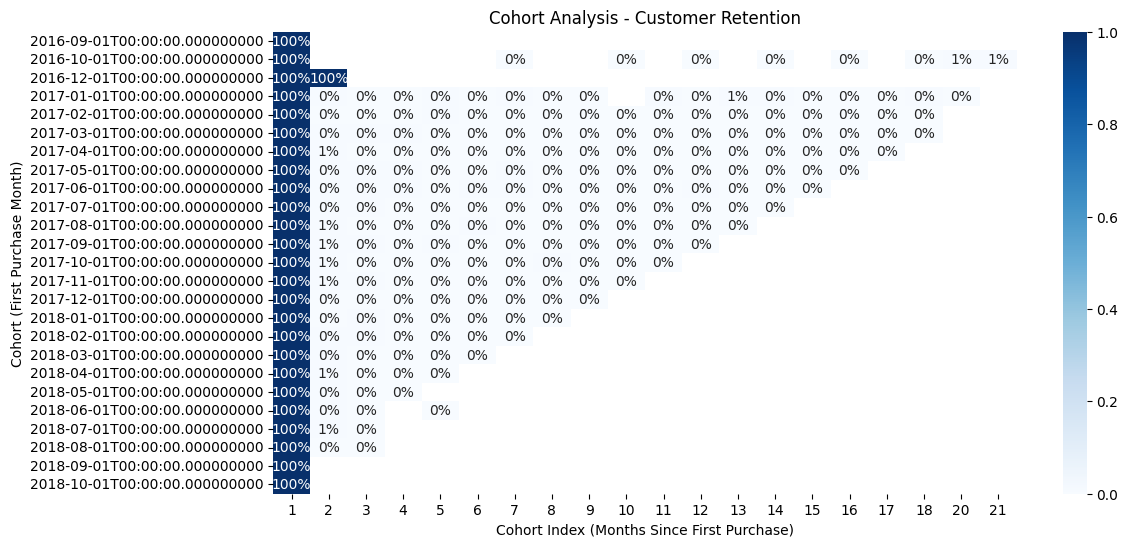

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.heatmap(cohort_retention, annot=True, fmt=".0%", cmap="Blues")
plt.title("Cohort Analysis - Customer Retention")
plt.ylabel("Cohort (First Purchase Month)")
plt.xlabel("Cohort Index (Months Since First Purchase)")
plt.show()


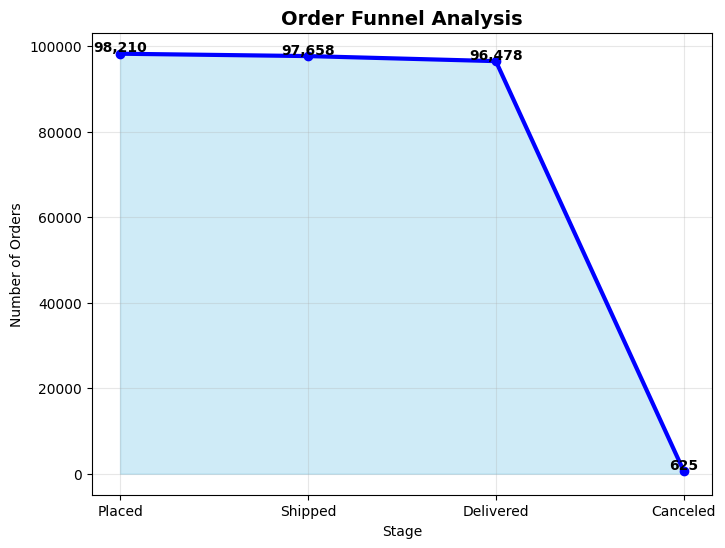

In [28]:
import matplotlib.pyplot as plt

# Funnel data from earlier
funnel_data = funnel.copy()
stages = funnel_data['Stage']
orders = funnel_data['Orders']

plt.figure(figsize=(8,6))
plt.plot(stages, orders, marker='o', color='blue', linewidth=3)
plt.fill_between(stages, orders, color='skyblue', alpha=0.4)

for i, val in enumerate(orders):
    plt.text(i, val+500, f"{val:,}", ha='center', fontsize=10, fontweight='bold')

plt.title("Order Funnel Analysis", fontsize=14, fontweight='bold')
plt.xlabel("Stage")
plt.ylabel("Number of Orders")
plt.grid(alpha=0.3)

# Save funnel chart
plt.savefig("funnel_chart.png", dpi=300, bbox_inches="tight")
plt.show()


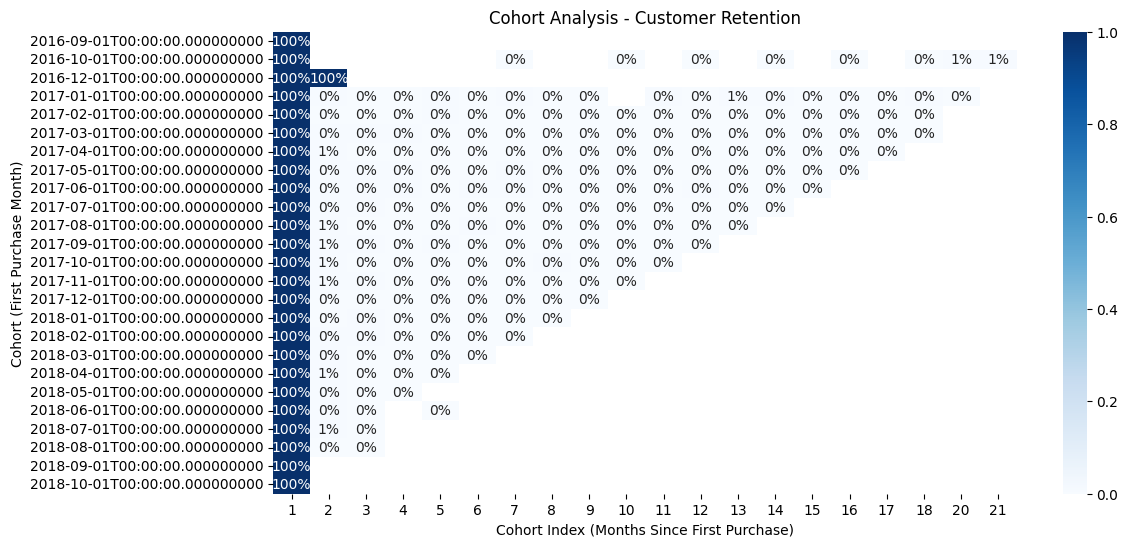

In [29]:
plt.figure(figsize=(12,6))
sns.heatmap(cohort_retention, annot=True, fmt=".0%", cmap="Blues")
plt.title("Cohort Analysis - Customer Retention")
plt.ylabel("Cohort (First Purchase Month)")
plt.xlabel("Cohort Index (Months Since First Purchase)")

# Save heatmap
plt.savefig("cohort_retention.png", dpi=300, bbox_inches="tight")
plt.show()


In [30]:
from google.colab import files
files.download("funnel_chart.png")
files.download("cohort_retention.png")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>